# Generate some simple geometry for a tube

As a surgical simulator we want to travel the length of the tube and create images from a camera point.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
#%matplotlib qt

Start by creating a line in 3D.

In [2]:
stepSize = 0.5
smoothness = 0.6
length = 20
endPoint = np.asarray([0,0,0])
centerLine = [endPoint]
randomDir = np.asarray([0,0,1])
for i in range(length):
    randomDir = randomDir + (np.random.rand(3)*2 -
                             np.asarray([smoothness, smoothness, smoothness]))
    randomDir = randomDir / np.linalg.norm(randomDir)
    endPoint = endPoint + (stepSize * randomDir)
    centerLine.append(endPoint)
#centerLine

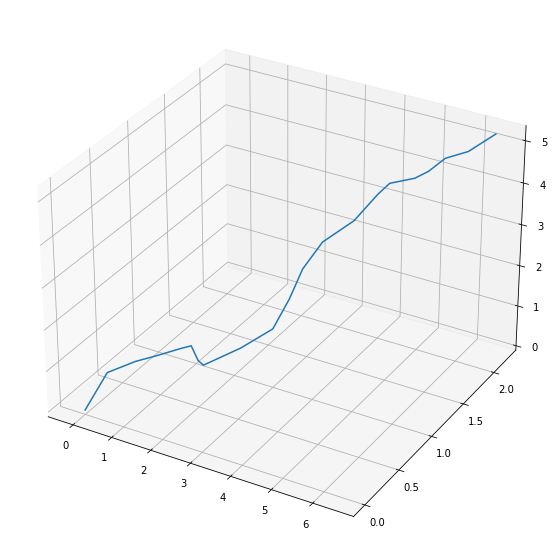

In [3]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x = [a[0] for a in centerLine]
y = [a[1] for a in centerLine]
z = [a[2] for a in centerLine]
ax.plot(x,y,z)
plt.show()

Compute two vectors that are orthogonal to the centerline at each point. Those two vectors t and b will be in the plane that contains our circle.

In [4]:
radius = 0.3
circlePoints = 10
circles = []
for i in range(len(centerLine)-1):
    v = centerLine[i+1] - centerLine[i]
    v = v / np.linalg.norm(v)
    r = np.random.rand(3)-0.5
    r = r / np.linalg.norm(r)
    t = np.cross(v, r)
    t = t / np.linalg.norm(t)
    b=t
    # now use these vectors to place our circle
    circle = []
    for j in range(circlePoints):
        angleOfRotation = j*(2*math.pi/circlePoints)
        b2 = b*np.cos(angleOfRotation) + (np.cross(v,b)*np.sin(angleOfRotation) + v*(np.dot(v,b)*(1-np.cos(angleOfRotation))))
        b2 = b2 / np.linalg.norm(b2)
        b2 = radius * b2
        circle.append(centerLine[i+1] + b2)
    circle.append(circle[0])
    circles.append(circle)

Show all the circles together with the line.

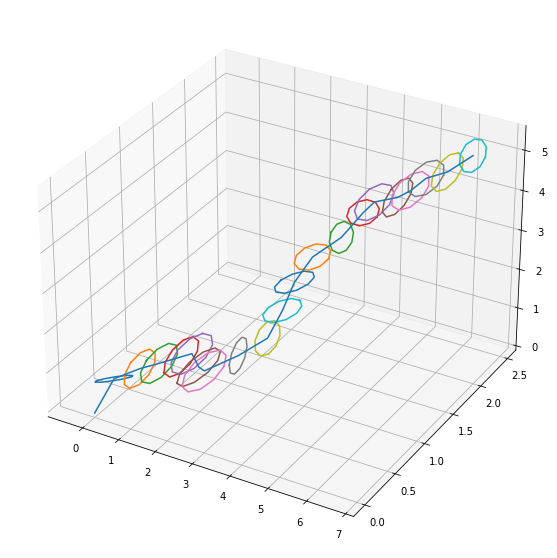

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = [a[0] for a in centerLine]
y = [a[1] for a in centerLine]
z = [a[2] for a in centerLine]
for i in range(len(circles)):
    circle = circles[i]
    xc = [a[0] for a in circle]
    yc = [a[1] for a in circle]
    zc = [a[2] for a in circle]
    ax.plot(xc, yc, zc)
ax.plot(x, y, z)
plt.gca().set_aspect('auto')
plt.show()


Now we can create a triangulated surface that connects the points with each other. For this operation a pair of points from each circle are connected to another pair of points in the next circle. Problem is that circles might be roated relative to each other (based on the random vector used to define vector b above).

In [6]:
# For each circle compute the best shift in indices to prevent bad triangles
shifts = np.asarray(list(range(circlePoints+1)))
def computeBetterShifts(shifts):
    return shifts
shifts = computeBetterShifts(shifts)
# put all the circle points into a vertices array
vertices = []
for i in range(len(circles)):
    circle = circles[i]
    for j in range(len(circle)):
        vertices.append(circle[j])

In [7]:
triangles = []
# test with a simple double ring first
circleID = 0
# for the current circle go through all its points and connect to the next circle
for i in range(circlePoints):
    pidx1r1 = circleID*(circlePoints+1) + i
    pidx2r1 = (pidx1r1+1)%(circlePoints+1)

    pidx1r2 = (pidx1r1+shifts[circleID])
    pidx2r2 = (pidx1r2+1)%(circlePoints+1)
    pidx1r2 = pidx1r2 + circlePoints*(circleID+1)
    pidx2r2 = pidx2r2 + circlePoints*(circleID+1)
    #print(pidx1r1, pidx2r1, pidx1r2, pidx2r2)
    triangles.append([pidx1r1, pidx2r1, pidx1r2])
    triangles.append([pidx1r2, pidx2r1, pidx2r2])
triangles

[[0, 1, 10],
 [10, 1, 11],
 [1, 2, 11],
 [11, 2, 12],
 [2, 3, 12],
 [12, 3, 13],
 [3, 4, 13],
 [13, 4, 14],
 [4, 5, 14],
 [14, 5, 15],
 [5, 6, 15],
 [15, 6, 16],
 [6, 7, 16],
 [16, 7, 17],
 [7, 8, 17],
 [17, 8, 18],
 [8, 9, 18],
 [18, 9, 19],
 [9, 10, 19],
 [19, 10, 20]]

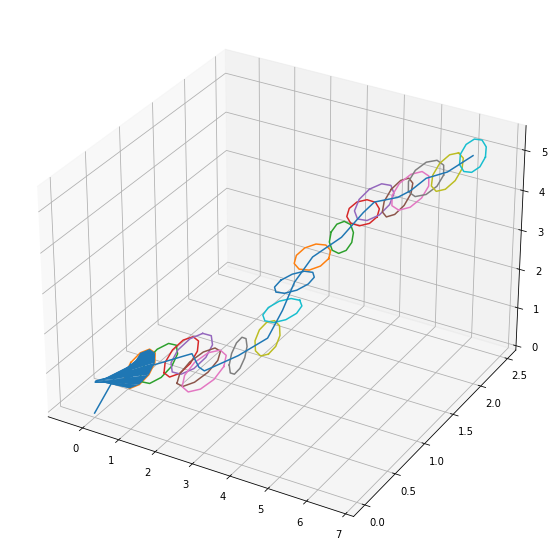

In [8]:
# plot the triangles together with everything else
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# should be array of coordinates
trigDisplay = []
for i in range(len(triangles)):
    trig = [list(vertices[triangles[i][0]]), list(vertices[triangles[i][1]]), list(vertices[triangles[i][2]])]
    trigDisplay.append(trig)
#print(trigDisplay)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = [a[0] for a in centerLine]
y = [a[1] for a in centerLine]
z = [a[2] for a in centerLine]
for i in range(len(circles)):
    circle = circles[i]
    xc = [a[0] for a in circle]
    yc = [a[1] for a in circle]
    zc = [a[2] for a in circle]
    ax.plot(xc, yc, zc)
ax.plot(x, y, z)
plt.gca().set_aspect('auto')

ax.add_collection(Poly3DCollection(trigDisplay))

#ax.set_xlim([0,10])
#ax.set_ylim([0,10])
#ax.set_zlim([0,10])

plt.show()